# **1 Importations des bibliothèques pour les expérimentations**

In [ ]:
import os, sys, matplotlib.pyplot as plt, numpy as np, torch
sys.path.append(os.path.abspath("../src"))
from Begin_Func import load_img, operateur, save_path
from Proxy_Func import fista, prox_l6 # prox_l6 = prox_tv

# **2 Simulations d'images dégradés**

In [2]:
Im_starfish = load_img("starfish.png", subfolder='data/set3c')

H, W, C = Im_starfish.shape

## **2-1 Image Bruitée**

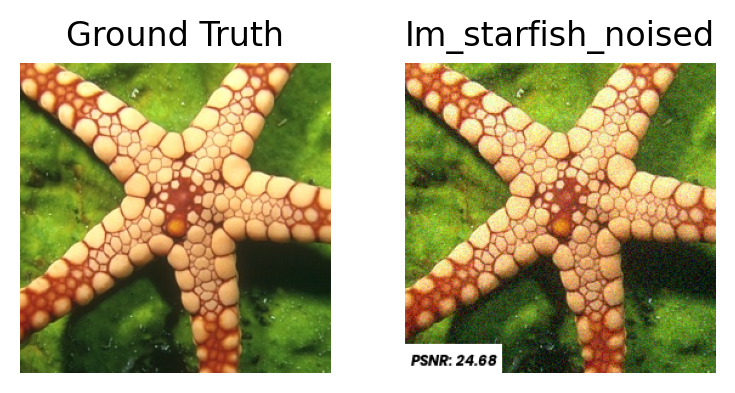

In [ ]:
Im_starfish_noised = operateur(Im_starfish).noise(sigma=0.06) # Image avec un niveau faible de bruit de 0.06

# Fonction save_path initialement prévu pour la sauvegarde mais utiliser ici pour l'affichage
save_path("results", "Noising", [["Im_starfish_noised"]], [[Im_starfish_noised]], [Im_starfish], psnr=True, save=False) 

## **2-2 Image Floutée**

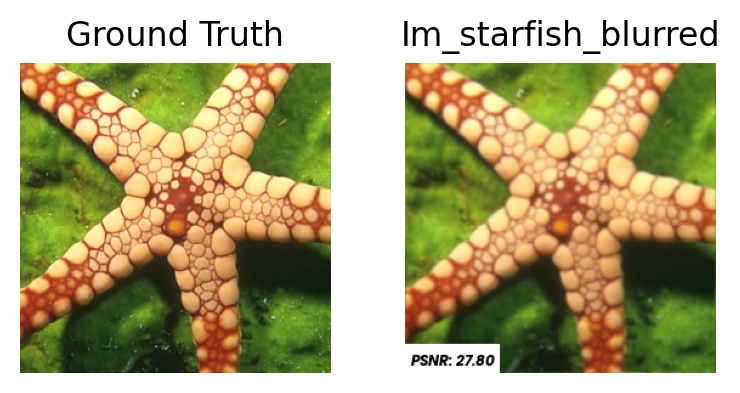

In [5]:
Im_starfish_blurred, G_starfish = operateur(Im_starfish).blur(sigma = (1, 1), angle = 0) # Image avec un niveau faible de flou (1,1)

save_path("results", "Blurring", [["Im_starfish_blurred"]], [[Im_starfish_blurred]], [Im_starfish], psnr=True, save=False)

## **2-3 Image Masquée** 

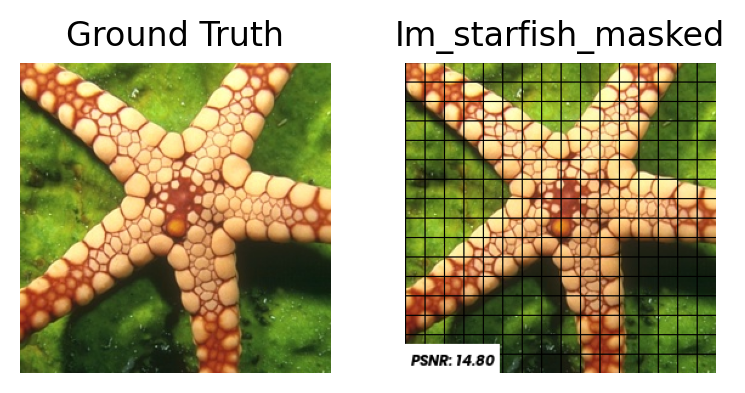

In [7]:
# Création d'un masque sous forme de grille uniforme
mask = torch.ones(1, 1, H, W)

mask[:, :, 0::int(np.sqrt(H)), :], mask[:, :, :, 0::int(np.sqrt(W))] = 0, 0

mask = mask.to(torch.bool)

Im_starfish_masked, Mask_star = operateur(Im_starfish).inpaint(mask=mask, sigma=0)

save_path("results", "Painting", [["Im_starfish_masked"]], [[Im_starfish_masked]], [Im_starfish], psnr=True, save=False)

# **3 Résolution de ces dégradations**

## **3-1 Méthode classique (via Total Variation)**

In [ ]:
# Résolution avec Fista

Im_starfish_denoised, _ = fista(Im_starfish_noised, operator_type="none", operator_params=None, lambd=0.01, tau=0.25, K=25,
                                 prox=prox_l6, prox_params={"tau": 0.1, "K": 5}, tol=1e-7, init=False)

Im_starfish_deblurred, _ = fista(Im_starfish_blurred, operator_type="convolution", operator_params={"G": G_starfish}, 
                                     lambd=1e-4, tau=1.3, K=50, prox=prox_l6, prox_params={"tau": 1e-4, "K": 20}, tol=1e-7, init=False)

Im_starfish_demasked, _ = fista(Im_starfish_masked, "mask", {"Mask": Mask_star}, lambd=0.1, tau=1, K=25, 
                                               prox=prox_l6, prox_params={"tau": 0.01, "K": 10}, tol=1e-7, init=False)

Fista_TV Algorithm: 100%|██████████| 25/25 [00:02<00:00,  9.56it/s]


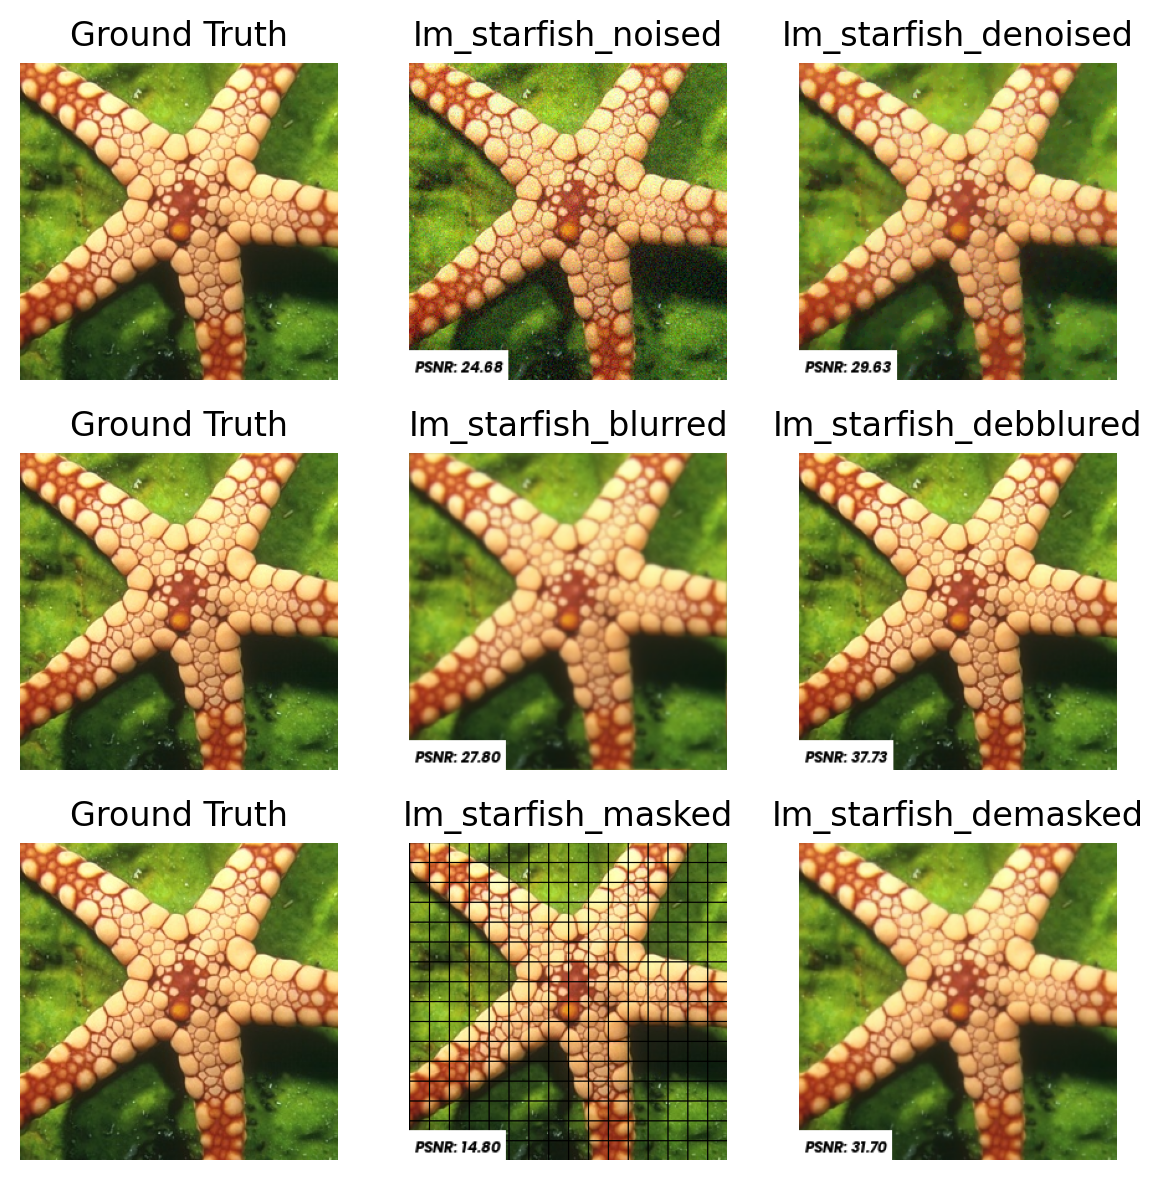

In [12]:
# Résultats

names_list = [["Im_starfish_noised", "Im_starfish_denoised"], ["Im_starfish_blurred", "Im_starfish_debblured"], ["Im_starfish_masked", "Im_starfish_demasked"]]

imgs_list = [[Im_starfish_noised, Im_starfish_denoised], [Im_starfish_blurred, Im_starfish_deblurred], [Im_starfish_masked, Im_starfish_demasked]]

save_path("results", "TV_Methods", names_list, 
          imgs_list, [Im_starfish, Im_starfish, Im_starfish], psnr=True, save=False)